In [14]:
import random
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
def insertionSort(A: list) -> tuple:
    cnt = 0
    for i in range(1, len(A)):
        for j in range(i, 0, -1):
            # counts key comparisons 
            cnt += 1
            if A[j] < A[j - 1]:
                A[j], A[j - 1] = A[j - 1], A[j]
            else:
                break
    return (A, cnt)

In [5]:
def merge(A: list, B: list) -> tuple:
    # a stores index of A, b stores index of B, cnt is key comparisons
    a, b, cnt = 0, 0, 0
    ret = []
    while a < len(A) and b < len(B):
        cnt += 1
        if A[a] < B[b]:
            ret.append(A[a])
            a += 1
        else:
            ret.append(B[b])
            b += 1
    while a < len(A):
        ret.append(A[a])
        a += 1
    while b < len(B):
        ret.append(B[b])
        b += 1
    return (ret, cnt)
        
def mergeSort(A: list) -> tuple:
    if len(A) <= 1:
        return (A, 0)
    l, r = 0, len(A) - 1
    mid = (l + r + 1) // 2
    L, cnt_l = mergeSort(A[:mid])
    R, cnt_r = mergeSort(A[mid:])
    A, cnt_merge = merge(L, R)
    return (A, cnt_l + cnt_r + cnt_merge)

In [6]:
def hybridSort(A: list, S: int) -> tuple:
    if len(A) <= S:
        return insertionSort(A)
    elif len(A) <= 1:
        return (A, 0)
    l, r = 0, len(A) - 1
    mid = (l + r + 1) // 2
    L, cnt_l = hybridSort(A[:mid], S)
    R, cnt_r = hybridSort(A[mid:], S)
    A, cnt_merge = merge(L, R)
    return (A, cnt_l + cnt_r + cnt_merge)

In [4]:
def hybridTest(A: list):
    tmp = A.copy()
    print("S\tKey Comparisons")
    for s in range(len(A) + 1):
        A = tmp
        print(f"{s}\t{hybridSort(A, s)[1]}")

In [5]:
A = [5, 2, 4, 2, 1]
insertionSort(A)

([1, 2, 2, 4, 5], 10)

In [6]:
A = [14, 40, 31, 28, 3, 15, 17, 51]
mergeSort(A)

([3, 14, 15, 17, 28, 31, 40, 51], 16)

In [7]:
hybridTest(A)

S	Key Comparisons
0	16
1	16
2	16
3	16
4	16
5	16
6	16
7	16
8	19


In [8]:
A = [23, 23, 23, 23, 23, 23, 23, 23]
mergeSort(A)

([23, 23, 23, 23, 23, 23, 23, 23], 12)

In [9]:
hybridTest(A)

S	Key Comparisons
0	12
1	12
2	12
3	12
4	10
5	10
6	10
7	10
8	7


In [35]:
data_sizes = [1000 * 10**i for i in range(5)]
# Generate the data, from 1000 to 10million
x = 100000
S = 300
# we fix S
datasets = []
key_comparisons = []
for size in data_sizes:
    A = [random.randint(1, x) for _ in range(size)]
    datasets.append(A)
    




In [36]:
for A in datasets:
    sortedA, cnt = hybridSort(A, S)
    key_comparisons.append(cnt)

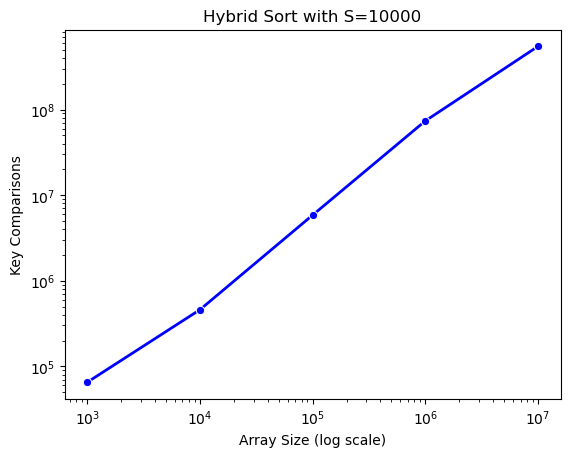

In [37]:
sb.lineplot(x=data_sizes, y=key_comparisons, marker='o', linewidth=2, color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Array Size (log scale)")
plt.ylabel("Key Comparisons")
plt.title("Hybrid Sort with S=10000")
plt.show()

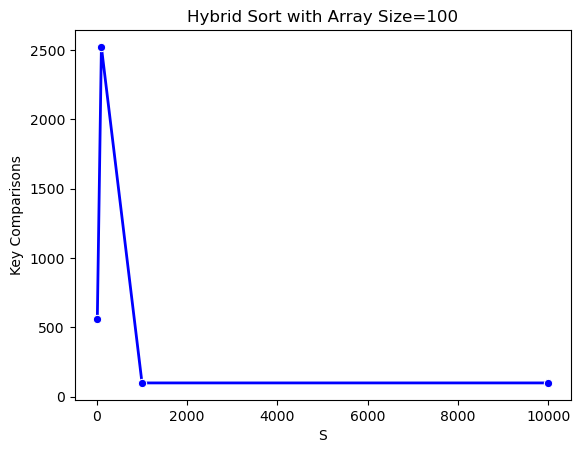

In [38]:
n = 100
A = [random.randint(1, x) for _ in range(n)]
S_range = [10, 100, 1000, 10000]
key_comparisons = []
for S in S_range:
    sortedA, cnt = hybridSort(A, S)
    key_comparisons.append(cnt)
    
sb.lineplot(x=S_range, y=key_comparisons, marker='o', linewidth=2, color='blue')
plt.xlabel("S")
plt.ylabel("Key Comparisons")
plt.title("Hybrid Sort with Array Size=100")
plt.show()

In [ ]:
# Determine optimal value of S
# Do a binary search from [1, 1000] (to avoid it being too long)
A = [random.randint(1, x) for _ in range(10000)]